In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import DBSCAN

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head() 
iris.info()
iris.describe()
iris.columns
iris.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris.iloc[0,4] = 'versicolor'
iris.iloc[3,4] = 'versicolor'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,versicolor
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,versicolor
4,5.0,3.6,1.4,0.2,setosa


In [6]:
versi_df = iris.loc[iris['species']=='versicolor']
versi_df = versi_df.reset_index(drop=True)
versi_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,versicolor
1,4.6,3.1,1.5,0.2,versicolor
2,7.0,3.2,4.7,1.4,versicolor
3,6.4,3.2,4.5,1.5,versicolor
4,6.9,3.1,4.9,1.5,versicolor


In [7]:
versi_np = versi_df.iloc[:,:4].values
scaler = MinMaxScaler()
versi_sc = scaler.fit_transform(versi_np)

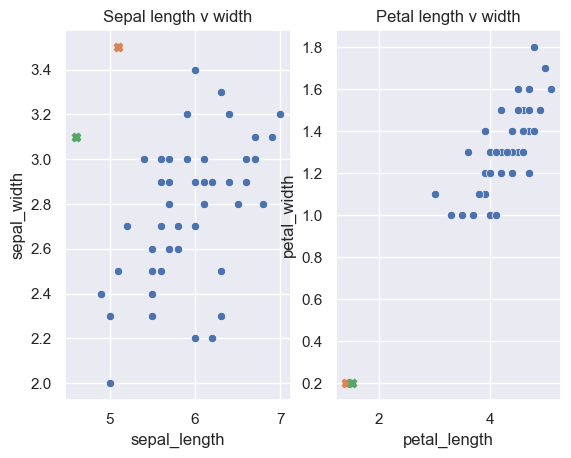

In [8]:
sns.set()
plt.subplot(1,2,1)
sns.scatterplot(data=versi_df, x='sepal_length', y='sepal_width')
plt.scatter(x=5.1, y=3.5, marker='X')
plt.scatter(x=4.6, y=3.1, marker='X')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal length v width')

plt.subplot(1,2,2)
sns.scatterplot(data=versi_df, x='petal_length', y='petal_width')
plt.scatter(x=1.4, y=0.2, marker='X')
plt.scatter(x=1.5, y=0.2, marker='X')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Petal length v width')
plt.show()

c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

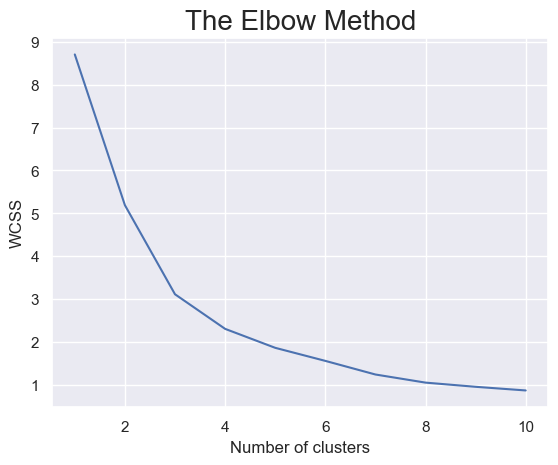

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)  # Firstly call the algorithm
    kmeans.fit(versi_sc)  # fit is always used to train an algorithm
    wcss.append(kmeans.inertia_)  # inertia_ gives us the wcss value for each cluster.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2).fit(versi_sc)

c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
versi_sc_clusters = kmeans.predict(versi_sc)
versi_sc_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(versi_sc, versi_sc_clusters_centers[versi_sc_clusters])]

print(versi_sc_clusters)
print(dist)

[2 2 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0]
[0.16973829052309358, 0.16973829052309358, 0.36669800330892427, 0.17654781663802493, 0.3180843415631207, 0.15697312015235534, 0.17270490055963583, 0.25577725685226965, 0.24726762061674054, 0.3379988960878517, 0.19179623285625302, 0.25052765936152327, 0.42752878535966077, 0.1644839512460406, 0.28929909528897924, 0.08098112664152742, 0.2936961290274949, 0.2271926003235058, 0.2568236819109659, 0.21206988054320336, 0.42438481101596554, 0.048900486460391385, 0.3085595483901387, 0.21115242914920365, 0.33351929421251136, 0.1974611178528623, 0.14400897576146676, 0.1712728510860691, 0.2819110527205726, 0.29031965628207407, 0.10694545709552165, 0.17230476225042557, 0.08109512966352744, 0.13303332917234986, 0.17256302325252762, 0.27001665710216594, 0.3391879153278917, 0.31483316500892766, 0.2294230381195921, 0.3719047099891419, 0.29392784556245244, 0.0924981316876708, 0.16572786653417793, 0.

In [12]:
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [13]:
versi_clus = pd.concat([versi_df,
                        pd.DataFrame(versi_sc_clusters,columns=['Clusters'])],axis=1)

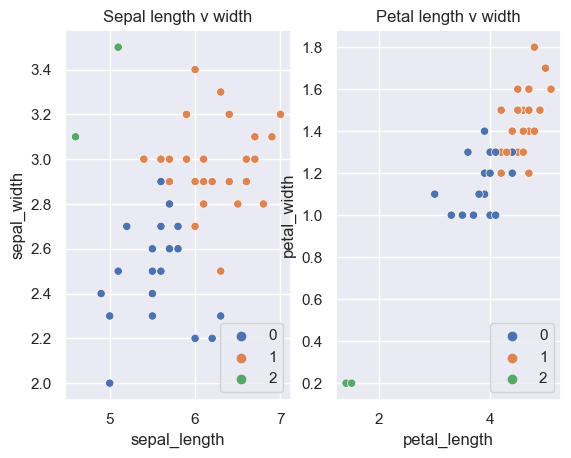

In [14]:
plt.subplot(1,2,1)
sns.scatterplot(data=versi_clus, x='sepal_length', y='sepal_width', hue='Clusters', palette='deep')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend( loc='lower right')
plt.title('Sepal length v width')

plt.subplot(1,2,2)
sns.scatterplot(data=versi_clus, x='petal_length', y='petal_width', hue='Clusters', palette='deep')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(loc='lower right')
plt.title('Petal length v width')
plt.show()

In [15]:
db = DBSCAN(eps=0.8, min_samples=1, n_jobs=-1).fit(versi_sc)

In [16]:
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

In [17]:
print('Estimated number of clusters: %d' % n_clusters)

Estimated number of clusters: 2


In [18]:
versi_db = pd.concat([versi_clus,
                        pd.DataFrame(pred_labels,columns=['db_cluster'])],axis=1)

In [19]:
versi_db.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters,db_cluster
0,5.1,3.5,1.4,0.2,versicolor,2,0
1,4.6,3.1,1.5,0.2,versicolor,2,0
2,7.0,3.2,4.7,1.4,versicolor,1,1
3,6.4,3.2,4.5,1.5,versicolor,1,1
4,6.9,3.1,4.9,1.5,versicolor,1,1
